<a href="https://colab.research.google.com/github/siddartha1192/edurekaCourses/blob/main/Tensorflow_and_First_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow Activation Functions

In [ ]:
import tensorflow as tf

In [ ]:
#Create Basic Tensor
x=tf.constant([-2,-1,0,1,2,3,4,5],dtype=tf.float32)
print(type(x))
print(x)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([-2. -1.  0.  1.  2.  3.  4.  5.], shape=(8,), dtype=float32)


In [ ]:
#Applying Activation function
#1.Sigmoid Function
tf.nn.sigmoid(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([0.11920292, 0.26894143, 0.5       , 0.73105854, 0.880797  ,
       0.95257413, 0.98201376, 0.9933072 ], dtype=float32)>

In [ ]:
#2.Tanh Function  (-1---1)
tf.nn.tanh(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([-0.9640276 , -0.7615942 ,  0.        ,  0.7615942 ,  0.9640276 ,
        0.9950547 ,  0.9993292 ,  0.99990916], dtype=float32)>

In [ ]:
#3.ReLU Function
tf.nn.relu(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0., 0., 0., 1., 2., 3., 4., 5.], dtype=float32)>

Create Layers in NN

In [ ]:
tf.keras.layers.Dense(100,activation='relu')

<Dense name=dense_24, built=False>

## MNIST Hand written Digit Recongnition

Objectives:

1.Build and train basic ANN using tensorflow and keras

2.Achieve max accuracy

3.Undesrtand the imact of no. of neurons,no. of layers, no. epochs, learning rate and batch size

4.Evaluate ANN and study the Lossees


In [ ]:
#Step1 : Import libraries
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist

In [ ]:
#Step2: Read Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, '7')

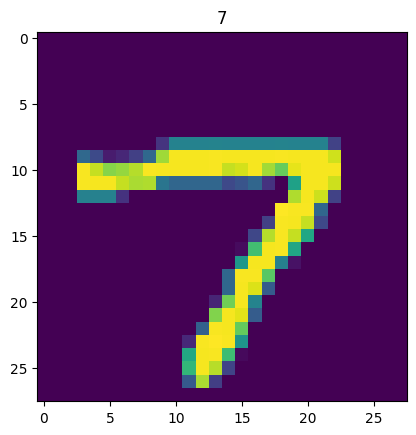

In [ ]:
#Visualization of imgaes
import matplotlib.pyplot as plt
plt.imshow(x_train[2540])
plt.title(y_train[2540])

In [ ]:
print(x_train[1500])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 120 223 249 217 244
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 186 254 149  5

In [ ]:
#Normalize pixel range to [0,1]
x_train=x_train/255
x_test=x_test/255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Text(0.5, 1.0, '7')

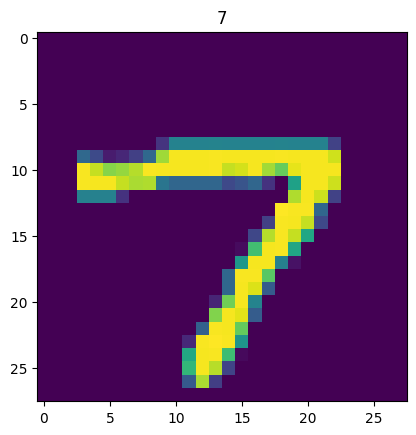

In [ ]:
plt.imshow(x_train[2540])
plt.title(y_train[2540])

In [ ]:
#Step:03 Flatten the Image data
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#Step: 04 Building the ANN
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(784,)))  #input layer
model.add(layers.Dense(64,activation='relu')) #Hidden layer
model.add(layers.Dense(10,activation='softmax'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Step: 05 Compiling ANN
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#Adam is optimizer
#SCC for multiclass problems
#Accuracy: measure of performance

In [ ]:
#Step:06 Train the ANN
epochs=20
batch_size=128
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7985 - loss: 0.6861 - val_accuracy: 0.9534 - val_loss: 0.1668
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9536 - loss: 0.1634 - val_accuracy: 0.9644 - val_loss: 0.1257
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9696 - loss: 0.1050 - val_accuracy: 0.9691 - val_loss: 0.1079
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.0753 - val_accuracy: 0.9738 - val_loss: 0.0906
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0543 - val_accuracy: 0.9705 - val_loss: 0.0966
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0447 - val_accuracy: 0.9731 - val_loss: 0.0924
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9899 - loss: 0.0341 - val_accuracy: 0.9737 - val_loss: 0.0905
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9924 - loss: 0.0276 - val_accuracy: 0.

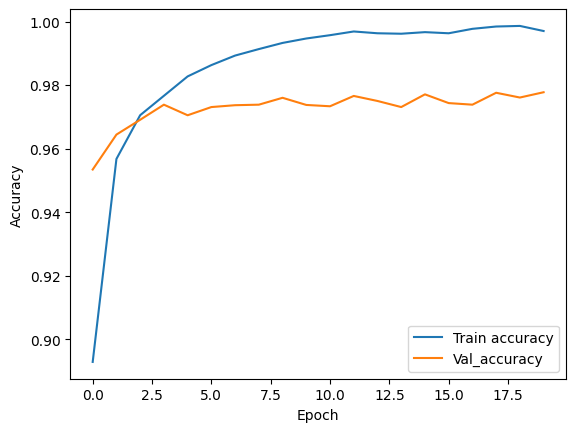

In [ ]:
#Step:07 Plot Accuracy and losses
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

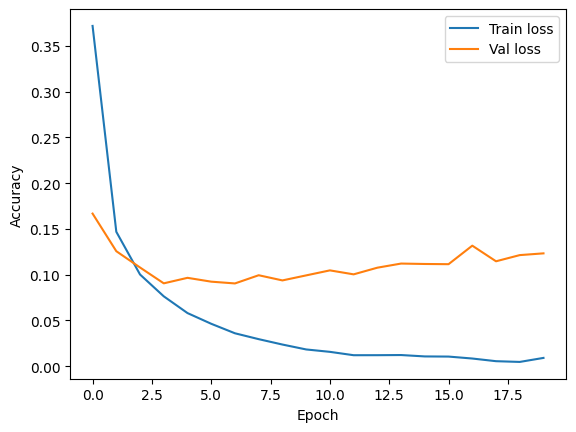

In [ ]:
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#Step: 08 Predict and Evaluate
y_pred=model.predict(x_test)
print(y_pred.shape)
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[6.85689908e-14 2.49671134e-11 9.50179033e-11 1.13164695e-08
 2.02505873e-19 1.25010259e-13 4.07212170e-21 1.00000000e+00
 4.84403370e-14 6.56581511e-10]


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 964    1    2    1    0    5    4    1    2    0]
 [   0 1123    4    0    0    0    2    0    6    0]
 [   3    2 1014    3    2    0    1    5    2    0]
 [   0    0    6  997    0    4    0    1    1    1]
 [   1    0    7    0  957    0    3    2    2   10]
 [   3    0    0   11    0  863    3    2    9    1]
 [   2    2    1    1    2    7  942    0    1    0]
 [   1    4   16    2    1    1    0  995    2    6]
 [   1    0    6   12    1    3    3    2  944    2]
 [   4    3    2   12    5    5    2    6    3  967]]


<Axes: >

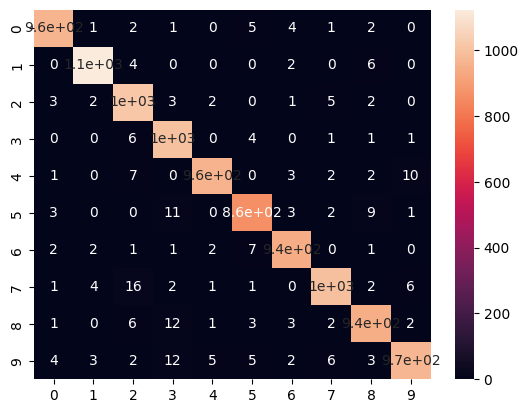

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print(y_test[0])

7


**Model Optimization**

In [ ]:
#Compile the Model with Optimizer & Learning Rate Scheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_optimized_model():
  model_opt=models.Sequential()
  model_opt.add(layers.Dense(128,activation='relu',input_shape=(784,)))  #input layer
  model_opt.add(layers.Dense(64,activation='relu'))#hidden layer
  model_opt.add(layers.Dense(10,activation='softmax'))  #output layer

  #default learning rate for the Adam optimizer in Keras is 0.001
  model_opt.compile(
      optimizer=Adam(learning_rate=0.001), #we can also change optimizer
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model_opt

model_opt = build_optimized_model()

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # What to monitor
    factor=0.5,             # Reduce LR by this factor
    patience=5,             # Wait 5 epochs with no improvement
    verbose=1,              # Print when it happens
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss', #Metric to track
    patience=5, #Number of epochs with no improvement before stopping
    restore_best_weights=True #If True, model returns to the best weights seen during training
)

**LR Reduction/Scheduling**

The learning rate controls how much the model updates its weights in response to the error it sees. If it’s too high, training becomes unstable. If it’s too low, training becomes slow or stuck.

ReduceLROnPlateau is a Keras callback that automatically reduces the learning rate when the model's performance stops improving (i.e. plateaus).

**If the validation loss (or accuracy) hasn’t improved for a few epochs, we reduce the learning rate by a factor.**

*   Prevents overshooting near minima.
*   Improves convergence when the learning plateaus.
*   Automates fine-tuning of learning rate during training.

**Early Stopping**

Early Stopping is a regularization technique used to prevent overfitting in neural networks by **halting training when the model stops improving on the validation set.**

Rather than training for a fixed number of epochs, we let the model decide when to stop based on validation performance.

•  Training loss typically decreases.
•  Validation loss may decrease at first, but can increase later (overfitting begins).
•  Early stopping halts training at the point where validation performance stops improving, preventing the model from "memorizing" the training data.

How It Works:
1.	Monitor a metric (usually val_loss or val_accuracy).
2.	Define patience — how many epochs to wait for improvement.
3.	If no improvement after patience epochs, training stops.
4.	Optionally, restore the best weights from before performance dropped.












In [ ]:
epochs=20
batch_size=128
history_opt_model= model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    callbacks=[reduce_lr, early_stop],
    verbose=2
)

Epoch 1/20
375/375 - 1s - 3ms/step - accuracy: 1.0000 - loss: 2.5836e-04 - val_accuracy: 0.9793 - val_loss: 0.1211 - learning_rate: 2.5000e-04
Epoch 2/20
375/375 - 1s - 3ms/step - accuracy: 1.0000 - loss: 2.1318e-04 - val_accuracy: 0.9789 - val_loss: 0.1226 - learning_rate: 2.5000e-04
Epoch 3/20
375/375 - 1s - 3ms/step - accuracy: 1.0000 - loss: 1.8102e-04 - val_accuracy: 0.9787 - val_loss: 0.1233 - learning_rate: 2.5000e-04
Epoch 4/20
375/375 - 1s - 3ms/step - accuracy: 1.0000 - loss: 1.6223e-04 - val_accuracy: 0.9793 - val_loss: 0.1253 - learning_rate: 2.5000e-04
Epoch 5/20
375/375 - 1s - 3ms/step - accuracy: 1.0000 - loss: 1.4420e-04 - val_accuracy: 0.9792 - val_loss: 0.1263 - learning_rate: 2.5000e-04
Epoch 6/20

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
375/375 - 1s - 3ms/step - accuracy: 1.0000 - loss: 1.2386e-04 - val_accuracy: 0.9791 - val_loss: 0.1272 - learning_rate: 2.5000e-04


In [ ]:
y_pred_opt=model_opt.predict(x_test)
print(y_pred_opt.shape)
print(y_pred_opt[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[0.06925066 0.16675703 0.15699697 0.07187479 0.11518694 0.10219193
 0.06939678 0.04136518 0.10079493 0.10618488]


In [ ]:
y_pred_opt=np.argmax(y_pred_opt,axis=1)
cm=confusion_matrix(y_test,y_pred_opt)
print(cm)

[[  0 337 643   0   0   0   0   0   0   0]
 [  0 686 449   0   0   0   0   0   0   0]
 [  0 720 312   0   0   0   0   0   0   0]
 [  0 177 830   0   0   1   0   0   0   2]
 [  0 496 472   0   0   0   0   0  14   0]
 [  0 171 718   0   0   1   0   0   1   1]
 [  0 317 640   0   0   0   0   0   1   0]
 [  0 670 354   0   0   0   0   0   4   0]
 [  0 476 498   0   0   0   0   0   0   0]
 [  0 383 621   0   0   0   0   0   5   0]]


In [ ]:
print(classification_report(y_test,y_pred_opt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.15      0.60      0.25      1135
           2       0.06      0.30      0.09      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.50      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.07      0.09      0.03     10000
weighted avg       0.07      0.10      0.04     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


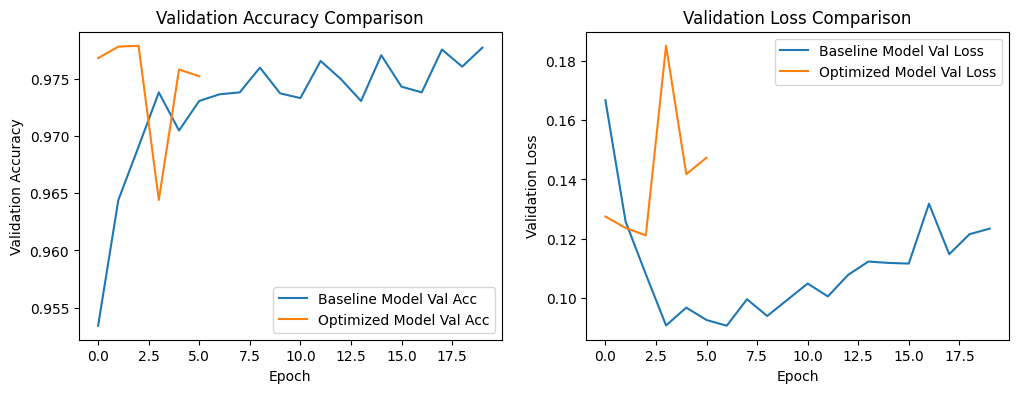

In [ ]:
#Compare Baseline and Optimized Model
from matplotlib import pyplot as plt
label1='Baseline Model'
label2='Optimized Model'
plt.figure(figsize=(12,4))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'], label=f'{label1} Val Acc')
plt.plot(history_opt_model.history['val_accuracy'], label=f'{label2} Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'], label=f'{label1} Val Loss')
plt.plot(history_opt_model.history['val_loss'], label=f'{label2} Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()

plt.show()